In [2]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

In [3]:
eps = 0.01;
Aeps = np.array([[1,50],[0,eps]]);

beps = np.array([2,eps])

In [4]:
xeps = la.solve(Aeps,beps);
print(xeps)

[-48.   1.]


In [5]:
U,S,Vt = la.svd(Aeps)
xsvd = (np.inner(U[:,0],beps)/S[0])*(Vt[0,:].T)
print(xsvd)

[0.00079968 0.03998404]


In [6]:
lam = 12
Alam = np.zeros((4,2))
Alam[0:2,:] = Aeps
Alam[2:4,:] = lam*np.eye(2)
print(Alam)

bhat = np.zeros(4)
bhat[0:2] = beps

print(bhat)

[[1.0e+00 5.0e+01]
 [0.0e+00 1.0e-02]
 [1.2e+01 0.0e+00]
 [0.0e+00 1.2e+01]]
[2.   0.01 0.   0.  ]


In [7]:
xlam = la.lstsq(Alam,bhat)[0]
print(xlam)

[0.00075613 0.03780722]


[-1.84467505  0.07689354]
[0.00079744 0.0399681 ]
[0.00057126 0.0285633 ]


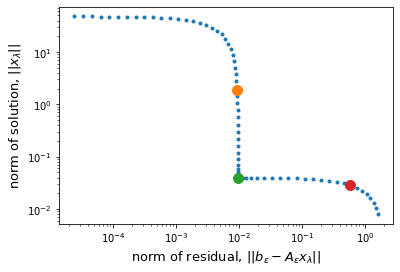

In [8]:
bhat = np.zeros(4)
bhat[0:2] = beps

lamvec = np.logspace(-5,2,100)
xnorm = np.array([])
rnorm = np.array([])
for lam in lamvec:
   Alam = np.zeros((4,2))
   Alam[0:2,:] = Aeps
   Alam[2:4,:] = lam*np.eye(2)
   xlam = la.lstsq(Alam,bhat)[0]
   xnorm = np.append(xnorm, la.norm(xlam))
   rnorm = np.append(rnorm, la.norm(beps-Aeps@xlam))
plt.loglog(rnorm,xnorm,'.')
plt.xlabel('norm of residual, $||b_{\epsilon} - A_{\epsilon} x_\lambda||$',fontsize=13)
plt.ylabel('norm of solution, $||x_\lambda||$',fontsize=13)

# highlight three values of lambda
for lam in np.array([1e-3,1,10**(1.5)]):
    Alam = np.zeros((4,2))
    Alam[0:2,:] = Aeps
    Alam[2:4,:] = lam*np.eye(2)
    xlam = la.lstsq(Alam,bhat)[0]
    print(xlam)
    plt.loglog(la.norm(beps-Aeps@xlam),la.norm(xlam),'.',markersize=20)

plt.savefig('twobytwoL.pdf')  
